## Business Case

Insurance companies face significant challenges in accurately predicting insurance claim payments due to the diverse nature of risk factors associated with each customer. Traditional models often fall short in capturing the nuances of individual risk profiles, leading to inefficiencies in claims processing and financial forecasting. This project aims to enhance the prediction of insurance claim payments by leveraging advanced data analytics and machine learning techniques to better understand and predict risk factors. By developing a more accurate prediction model, we will improve our ability to forecast claim payments, optimize resource allocation, and ultimately enhance profitability and customer satisfaction.

### Import Basic Libraries. 

- To start our analysis and model development for predicting flight ticket prices, we need to import several fundamental libraries. These libraries will help us with data manipulation, visualization, and machine learning tasks.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
data=pd.read_csv('train.csv')
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


#### Basic Checks

- data.shape: Returns the number of rows and columns in the DataFrame as a tuple.
- print(data.info()): Prints a concise summary of the DataFrame, including index and column dtypes, non-null values, and memory usage.
- data.describe(): Generates descriptive statistics for the DataFrame, including count, mean, std, min, 25%, 50%, 75%, and max values.
- data.head(3): Returns the first 3 rows of the DataFrame.
- data.tail(3): Returns the last 3 rows of the DataFrame.
- data.columns: Returns a list of column names in the DataFrame.

In [3]:
data.shape

(595212, 59)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0


In [7]:
data.tail(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [8]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


#### Data preprocessing

- data.isnull().sum(): Returns the total number of missing values in the DataFrame, broken down by column.
- data.duplicated().sum(): Returns the total number of duplicate rows in the DataFrame.

In [9]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [10]:
data.duplicated().sum()

0

In [11]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


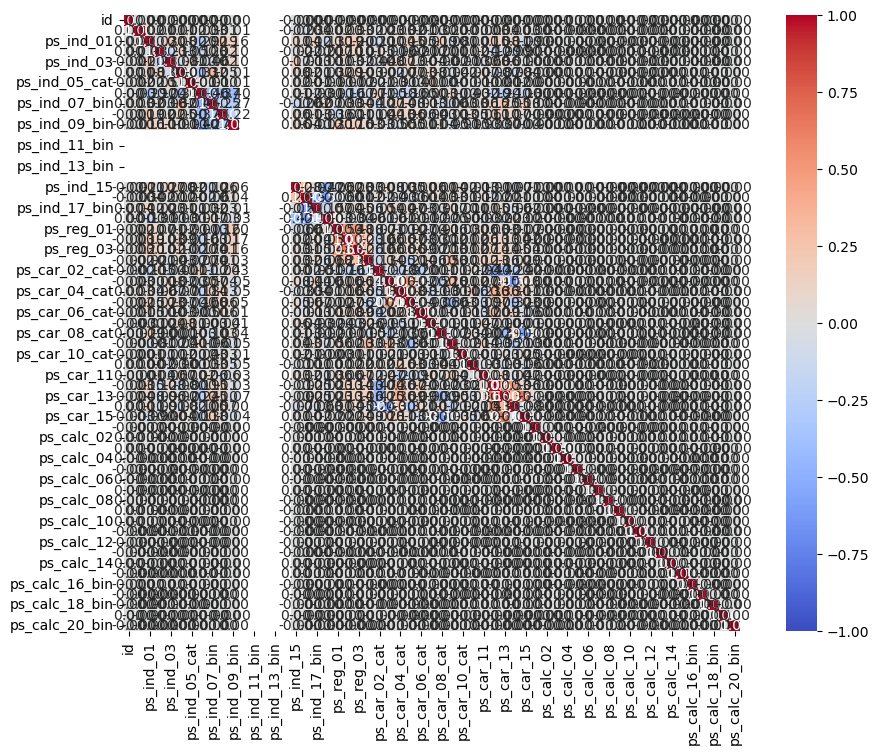

In [12]:
# Function to detect outliers
def detect_outliers(data, threshold=3):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    
    for value in data.values:  # Iterate over the values in the column
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)
            
    return outliers

# List of column names to exclude based on the dtype categorization
excluded_columns = [
    'id', 'target',
    # Exclude all _cat columns
    'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
    'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
    'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat',
    # Exclude all _bin columns
    'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
    'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
    'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
    'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
    'ps_calc_19_bin', 'ps_calc_20_bin'
]

# Select numeric columns excluding the above, ignoring any missing columns
numeric_columns = data.select_dtypes(include=[np.number]).drop(columns=excluded_columns, errors='ignore')

# Creating a copy of the DataFrame to remove outliers
data_cleaned = data.copy()

# Detecting and dropping outliers
for column in numeric_columns:
    outliers = detect_outliers(data_cleaned[column])
    if outliers:  # If outliers were detected
        data_cleaned = data_cleaned.loc[~data_cleaned[column].isin(outliers)]

# Fill missing values in the cleaned dataset
data_cleaned = data_cleaned.fillna(data_cleaned.median())

# Remove rows with missing values
data_cleaned = data_cleaned.dropna()

# Calculate correlation matrix for the cleaned dataset
correlation_matrix_cleaned = data_cleaned.corr(method='spearman')

# Check if the correlation matrix is empty
if not correlation_matrix_cleaned.empty:
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
    plt.show()
else:
    print("Correlation matrix is empty!")

##### Handling outliers and checking correlation of data

This code detects and removes outliers from a Pandas DataFrame using the Z-score method, fills missing values with the mean, and then calculates and visualizes the correlation matrix of the cleaned dataset using Seaborn's heatmap. The code excludes certain columns based on their data type and name, and handles missing values and empty correlation matrices. The resulting correlation matrix is displayed as a heatmap, providing insights into the relationships between the dataset's features.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [16]:
y_pred_rf = model_rf.predict(X_test_scaled)  # Predict on the test set

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9631645707853465


In [17]:
confusion_matrix(y_test,y_pred_rf)

array([[114658,      0],
       [  4385,      0]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_res, y_res = ros.fit_resample(X_train, y_train)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [21]:
model_rf_res = RandomForestClassifier(n_estimators=500, max_depth=10)
model_rf_res.fit(X_res_scaled, y_res)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [22]:
y_pred_rf_res = model_rf_res.predict(X_test_scaled)
accuracy_res = accuracy_score(y_test, y_pred_rf_res)
print("Accuracy (oversampled):", accuracy_res)

confusion_matrix(y_test, y_pred_rf_res)
print(classification_report(y_test, y_pred_rf_res))

Accuracy (oversampled): 0.6603412212393841
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    114658
           1       0.06      0.52      0.10      4385

    accuracy                           0.66    119043
   macro avg       0.51      0.59      0.45    119043
weighted avg       0.94      0.66      0.77    119043



In [23]:
# Try class weighting instead of oversampling
model_rf_weighted = RandomForestClassifier(class_weight='balanced')
model_rf_weighted.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_weighted = model_rf_weighted.predict(X_test_scaled)

# Evaluate the weighted model
accuracy_weighted = accuracy_score(y_test, y_pred_rf_weighted)
print("Accuracy (weighted):", accuracy_weighted)
print(confusion_matrix(y_test, y_pred_rf_weighted))
print(classification_report(y_test, y_pred_rf_weighted))

Accuracy (weighted): 0.9631645707853465
[[114658      0]
 [  4385      0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(class_weight='balanced')
model_svm.fit(X_train_scaled, y_train)

In [ ]:
# Predict on the test set
y_pred_svm = model_svm.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
# Print accuracy
print("Accuracy (SVM):", accuracy_svm)

In [ ]:
# Generate classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

In [ ]:
# Generate confusion matrix
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
## Method 1: Oversampling the minority class using SMOTE


from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit and transform the data
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Train a random forest model on the resampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_res, y_res)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Accuracy (RF with SMOTE):", accuracy_rf)

# Generate classification report
print("Classification Report (RF with SMOTE):")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
print("Confusion Matrix (RF with SMOTE):")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
## Method 2: Undersampling the majority class using RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_res, y_res = rus.fit_resample(X_train_scaled, y_train)

# Train a random forest model on the resampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_res, y_res)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Accuracy (RF with RUS):", accuracy_rf)

# Generate classification report
print("Classification Report (RF with RUS):")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
print("Confusion Matrix (RF with RUS):")
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
### Method 3: Using a different algorithm (Gradient Boosting Machine)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a gradient boosting machine model
model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gbm = model_gbm.predict(X_test_scaled)

# Calculate accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Print accuracy
print("Accuracy (GBM):", accuracy_gbm)

# Generate classification report
print("Classification Report (GBM):")
print(classification_report(y_test, y_pred_gbm))

# Generate confusion matrix
print("Confusion Matrix (GBM):")
print(confusion_matrix(y_test, y_pred_gbm))

In [ ]:
### Method 4: Using a different metric (F1-score)

from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Train an SVM model
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = model_svm.predict(X_test_scaled)

# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print F1-score
print("F1-score (SVM):", f1_svm)

# Generate classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))